In [1]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('passenger_satisfaction_data.csv')

df = pd.DataFrame(data)

In [2]:
### Preprocessing and create splits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# drop irrelevant cols
df = df.drop(['Unnamed: 0', 'id'], axis=1)

# drop null rows
df_nn = df.dropna(axis=0)
df = df_nn

# transform dependent variable to binary encoding
df['satisfaction'] = df['satisfaction'].map({'neutral or dissatisfied': 0, 'satisfied': 1})

# assign independent and dependent variables
y = df['satisfaction']
x = df.drop('satisfaction', axis=1)

# Select categorical columns that need encoding
categorical_columns = ['Customer Type', 'Type of Travel', 'Class', 'Gender']

# Apply one-hot encoding using Pandas get_dummies()
x_encoded = pd.get_dummies(x, columns=categorical_columns, dtype=int)

# train test split
X_train, X_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.4, random_state=45)

# normalise via standardisation
scaler = StandardScaler()

# apply standardisation to independent features
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

x.columns

Index(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes'],
      dtype='object')

In [3]:
### Create Model
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# instantiate the model
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train_scaled, y_train)

y_pred = logreg.predict(X_test_scaled)

In [4]:
### Feature importance

# create features array
features = []
for feature in x_encoded:
    if feature == 'satisfaction': continue
    features.append(feature)

# remove satisfaction column
features = features[0:-1]

# get feature coefficients
feature_importance = logreg.coef_[0]

# # Match features to importance scores
feature_importance_dict = dict(zip(features, feature_importance))
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract feature names and importance scores from sorted_features
features, importance = zip(*sorted_features)

print(importance)

(0.8242045004663763, 0.638340410795152, 0.5410108064684482, 0.41894776417291496, 0.4031173164753664, 0.3991092256224125, 0.3239757254652211, 0.3003402815566236, 0.20815343922185348, 0.155186511028308, 0.1368053635124261, 0.12306732465864138, 0.09617235663379892, 0.07302221125237372, 0.022832639670858045, -0.01592642086953606, -0.023267384505044418, -0.04689347077314698, -0.10400349516634051, -0.1370973106573955, -0.1549464209480141, -0.2029650083194919, -0.21557303967753122, -0.33835977704315623, -0.39910922562241274, -0.6383404107951518)


Accuracy: 0.8729607104932908
Precision: 0.8686583730287194
Recall: 0.8339475203125694
ROC Score: 0.868463238155738
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     29272
           1       0.87      0.83      0.85     22523

    accuracy                           0.87     51795
   macro avg       0.87      0.87      0.87     51795
weighted avg       0.87      0.87      0.87     51795



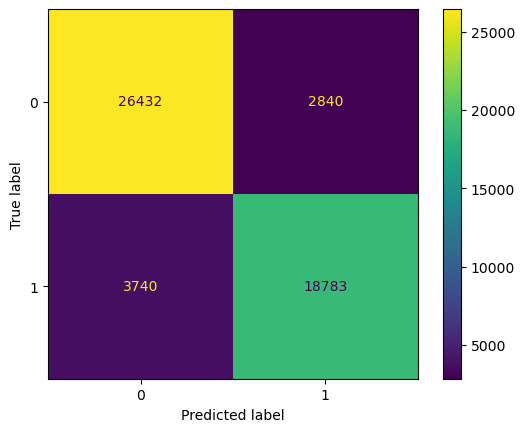

In [5]:
### Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

# Model report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"ROC Score: {auc}")
print(f"Classification Report:\n{classification_rep}")

# confusion matrix
dm_display = ConfusionMatrixDisplay(confusion_mat).plot()


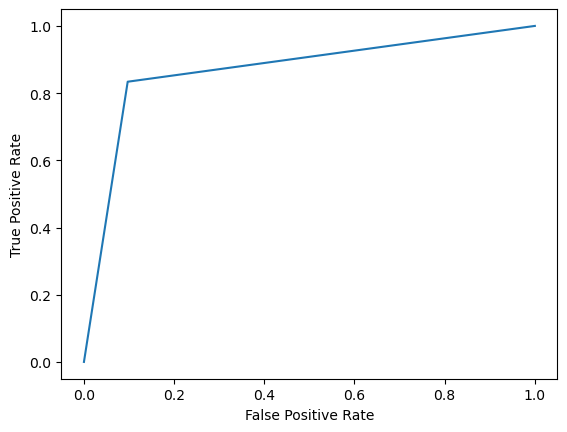

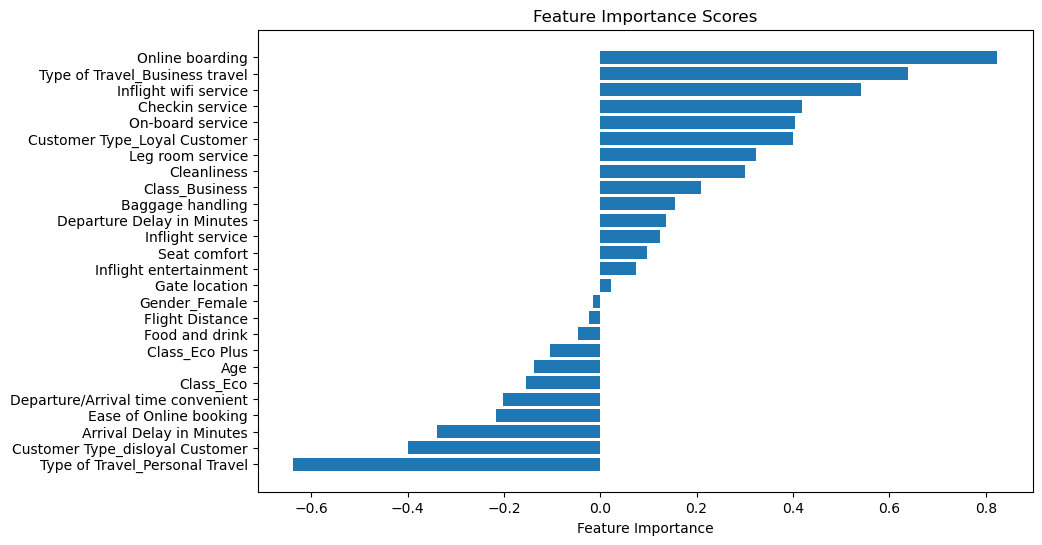

In [6]:
### Visualisation
from sklearn.metrics import roc_curve

## Notes
"""
- High sensititive -> True positive rate
- High specificity -> True negative rate
"""

# print ROC curve
fpr, tpr, _ = roc_curve(y_test,  y_pred)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


# Feature importance bar chart
plt.figure(figsize=(10, 6))
plt.barh(range(len(importance)), importance, align='center')
plt.yticks(range(len(features)), features)
plt.xlabel('Feature Importance')
plt.title('Feature Importance Scores')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()